In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cluster
from sklearn.metrics import mean_squared_error, r2_score 
import pandas as pd
import sklearn.model_selection
from collections import defaultdict

In [36]:
df = pd.read_csv("/Users/shensakura/Desktop/Stats 170A/project/STATS-170A-Group/Data_final/zip_housing_cleaned.csv")

In [37]:
df 

,Unnamed: 0,property_id,prop_type,year_built,is_new_construction,beds,baths,baths_beds_ratio,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code
0,0,O2889402305,multi_family,1906,False,3,2.0,0.6667,3,570000,7057,1756,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
1,1,O1305476579,single_family,1913,False,3,1.5,0.5000,1,470000,5721,1030,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
2,2,O9299703972,multi_family,1938,False,3,2.0,0.6667,2,830000,5495,2503,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001
3,3,O2866856410,single_family,1905,False,4,2.0,0.5000,2,400000,5387,1248,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001
4,4,O2823776981,condo,1912,False,5,2.0,0.4000,2,659000,5667,1897,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,98073,O1392454616,single_family,2006,False,3,2.5,0.8333,2,275000,2614,1430,2365 LA Villa Way,"['Northeast Redding', 'The Villages at Shasta ...",Redding,Shasta,CA,96003
98074,98074,O2959173930,NaN,1972,False,3,2.0,0.6667,2,899000,1146783,3550,13450 Mitchellinda Dr,NaN,Redding,Shasta,CA,96003
98075,98075,O1290952370,single_family,1977,False,3,2.0,0.6667,5,483500,89734,2552,19287 Roxie Ln,NaN,Redding,Shasta,CA,96003
98076,98076,O1523744489,single_family,1984,False,4,3.0,0.7500,4,345000,87120,2040,13143 Tamera Way,NaN,Redding,Shasta,CA,96003


In [45]:
df['lot_size'].value_counts()

1146783    10782
7405        1251
6000        1157
6098        1088
6534         867
           ...  
18786          1
35130          1
12589          1
801068         1
2049           1
Name: lot_size, Length: 16417, dtype: int64

In [81]:
db = cluster.DBSCAN(eps=3000,min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=100, p=None, n_jobs=None)

In [82]:
db.fit(df[['beds','baths','garage','building_size','lot_size','price']])

DBSCAN(algorithm='auto', eps=3000, leaf_size=100, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [90]:
result = defaultdict(int)
temp= []
for i in db.labels_:
    result[i]+=1
    if i==-1:
        temp.append(-1)
    else:
        temp.append(1)

In [91]:
result

defaultdict(int,
            {0: 67952,
             -1: 9902,
             1: 8260,
             2: 1565,
             3: 9,
             4: 44,
             5: 1592,
             10: 10,
             6: 30,
             7: 892,
             8: 28,
             9: 11,
             11: 59,
             337: 10,
             12: 143,
             13: 16,
             127: 16,
             200: 19,
             14: 57,
             15: 99,
             16: 7,
             17: 18,
             18: 7,
             19: 137,
             20: 598,
             21: 14,
             22: 55,
             23: 27,
             24: 16,
             25: 10,
             26: 90,
             27: 6,
             28: 20,
             29: 13,
             202: 14,
             30: 298,
             31: 48,
             105: 16,
             32: 41,
             33: 31,
             34: 254,
             35: 249,
             36: 17,
             37: 14,
             38: 89,
             39: 6,
         

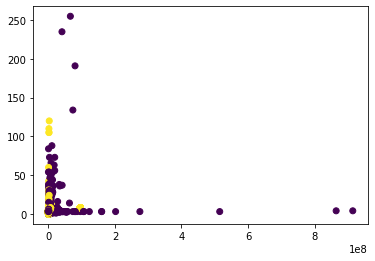

In [93]:
fig, ax = plt.subplots()
colors = {-1:'red', 1:'blue'}

ax.scatter(df['price'], df['beds'], c=temp)


In [31]:
ax1.scatter(df['beds'],df['price'])
fig.show()

/Users/shensakura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [33]:
house_Y= df['price']
house_X = df[['year_built','is_new_construction','baths_beds_ratio','beds','garage','lot_size','building_size']]

In [34]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(house_X, house_Y, test_size=0.3, random_state=42)

In [36]:
y_train.shape

(68654,)

In [37]:
regr = linear_model.LinearRegression()

In [38]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_predict  = regr.predict(X_test)

In [41]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-5.51814536e+03  1.07286404e+05  7.12070631e+05  2.16210375e+05
  3.84763446e+01 -6.92243606e-05  1.73280756e+02]


In [42]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

Mean squared error: 31769668434260052.00


In [43]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination: -3186.52


In [44]:
X_test

,year_built,is_new_construction,baths_beds_ratio,beds,garage,lot_size,building_size
13039,1955,False,0.6667,3,2,4726,1210
72449,1971,False,1.2500,2,2,1146783,1248
93029,1927,False,0.5000,4,1,6251,2031
3946,1920,False,0.6667,3,2,7501,2540
32715,2021,True,0.6250,4,3,23522,2059
...,...,...,...,...,...,...,...
58410,1972,False,0.6667,3,2,7630,1260
36001,1998,False,0.7500,4,3,14375,2467
44994,2019,False,0.6667,3,3,8588,3897
86170,2007,False,0.3333,6,2,5998,2000


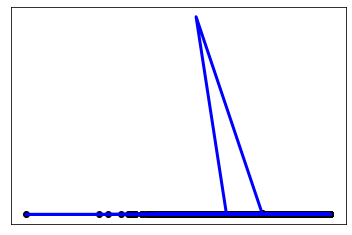

In [49]:
plt.scatter(X_test['year_built'], y_test,  color='black')
plt.plot(X_test['year_built'], y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()